# Preface
Some time ago my ex-classmate [artandfi](https://github.com/artandfi) had said something like this: ![](notebook_res/preface_1.png)
> btw in ZNO as a rule the shortest option is incorrect

Because it's harder to come up with the wrong options for the test

Things like that really can take place in general, and it's hard to say about correct answer distribution in all the tests.

But when we say about ZNO, my idea is that answer options are taken from course material too, so there should be no dependence between option length and its correctness. Besides, we can check it

**Let's go and check!**

# Data loading and cleaning
There is a dataset of official ZNO in ukrainian language and literature tasks from 2006-2020 years that I collected.
We don't need a question for this research

In [1]:
import pandas as pd
df = pd.read_csv('dataset.csv',index_col=0).drop(columns=['question'])
df.head()

,a,b,c,d,e,correct
0,олень,колесо,читання,випадок,NaN,b
1,не/зовсім зрозумілий,зошит не/підписано,не/всі з цим обізнані,не/забутня подорож,NaN,d
2,плащ,читач,ситець,насіння,NaN,a
3,розв'язувати задачу,уникнути небезпеки,заказати букет квітів,перекладати болгарською,NaN,c
4,пане Костянтине,для всіх дослідників,восьмидесяти років,візьмімо участь,NaN,c


In [2]:
len(df)

2291

Despite the web scrapper that collects this data is written by me too, I decide don't make additional cleaning in it.

Let's just imagine that data was not collected by me, and delete meaningless rows.

In [3]:
df = df[ df['a'].notna() & df['correct'].isin(('a','b','c','d','e')) ]
len(df)

2268

# Preparing
At first, replace answers with their length

In [4]:
import numpy as np
df.loc[:,'a':'e'] = df.loc[:,'a':'e'].applymap(lambda x: len(x) if pd.notnull(x) else np.NaN)
df

,a,b,c,d,e,correct
0,5,6,7,7,NaN,b
1,20,18,21,18,NaN,d
2,4,5,6,7,NaN,a
3,19,18,21,23,NaN,c
4,15,20,18,15,NaN,c
...,...,...,...,...,...,...
2286,22,20,9,16,NaN,b
2287,59,61,80,73,NaN,d
2288,55,53,56,53,NaN,c
2289,33,40,37,33,NaN,a


Then replace letter of correct answer with it length, and count its "rank" sequence number of it's length

In [5]:
def correct_length(row):
    row['correct'] = row[row['correct']]
    row['rank'] = (row.loc['a':'e'] < row['correct']).sum()
    return row
df = df.apply(correct_length, axis='columns')
df.head()

,a,b,c,d,e,correct,rank
0,5.0,6.0,7.0,7.0,NaN,6.0,1
1,20.0,18.0,21.0,18.0,NaN,18.0,0
2,4.0,5.0,6.0,7.0,NaN,4.0,0
3,19.0,18.0,21.0,23.0,NaN,21.0,2
4,15.0,20.0,18.0,15.0,NaN,18.0,2


In [6]:
df.loc[:,'a':'e'].mean().mean()

30.302491255389803

In [7]:
df['correct'].mean()

30.719135802469136

As we can see, in average, correct answer is a little bit longer. Hmmm

There are questions with 4 and 5 possible options. I think we should separate them for more correct testing

In [8]:
df5 = df[df['e'].notna()]
df4 = df.drop(df5.index).drop(columns=['e'])

# Some visual analysis

## Tasks with 4 possible options

In [9]:
df4.head()

,a,b,c,d,correct,rank
0,5.0,6.0,7.0,7.0,6.0,1
1,20.0,18.0,21.0,18.0,18.0,0
2,4.0,5.0,6.0,7.0,4.0,0
3,19.0,18.0,21.0,23.0,21.0,2
4,15.0,20.0,18.0,15.0,18.0,2


In [10]:
len(df4)

773

Grouping by rank:

In [11]:
dist4 = df4.groupby('rank').agg({'correct':len})
dist4

,correct
rank,
0,244.0
1,195.0
2,185.0
3,149.0


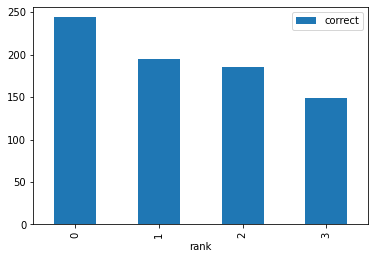

In [12]:
dist4.plot(kind='bar');

Looks like the shortest is correct more often than others

## Tasks with 5 possible options

In [13]:
df5.head()

,a,b,c,d,e,correct,rank
10,28.0,30.0,31.0,27.0,28.0,28.0,1
11,47.0,44.0,41.0,37.0,47.0,47.0,3
12,46.0,44.0,45.0,49.0,48.0,46.0,2
13,31.0,34.0,35.0,36.0,34.0,34.0,1
14,43.0,44.0,41.0,44.0,41.0,43.0,2


In [14]:
print(len(df5))

1495


Grouping by rank:

In [15]:
dist5 = df5.groupby('rank').agg({'correct':len})
dist5

,correct
rank,
0,334.0
1,339.0
2,292.0
3,294.0
4,236.0


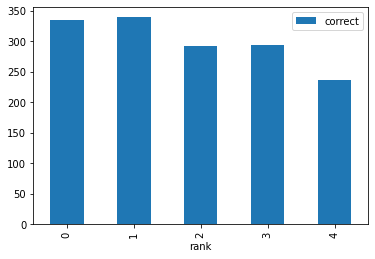

In [16]:
dist5.plot(kind='bar');

It's more like a uniform distribution

# Some math statistics tests. $\chi^2$
Let's check if our distributions are uniform 

In [17]:
from scipy.stats import chisquare

chisquare(dist4)

Power_divergenceResult(statistic=array([23.82794308]), pvalue=array([2.713364e-05]))

In [18]:
chisquare(dist5)

Power_divergenceResult(statistic=array([22.96989967]), pvalue=array([0.00012839]))

Hypothesis about uniform distribution rejected for both tasks. Based on our information we can say that the shortest answer is **correct** more often in case of task with 4 options, and same about two shortest in case of task with 5 options

# Afterword
If you have any ideas how to make this little research better or how to use this data in another way - let me know :)